<a href="https://colab.research.google.com/github/czsjahid/ML-journey/blob/main/LinReg_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Jahid\.cache\kagglehub\datasets\altavish\boston-housing-dataset\versions\1


In [ ]:
boston = pd.read_csv('HousingData.csv')

In [ ]:
import os
print(os.getcwd())

Z:\Instrument and Control\07. ENGINEERS [Mother Folder]\Jahid\ML


In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

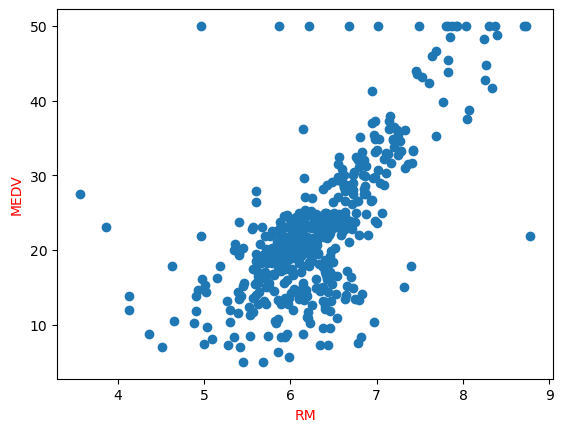

In [ ]:
plt.scatter(boston['RM'], boston['MEDV'] )
plt.xlabel('RM', color = 'red')
plt.ylabel('MEDV', color = 'red')
plt.show()

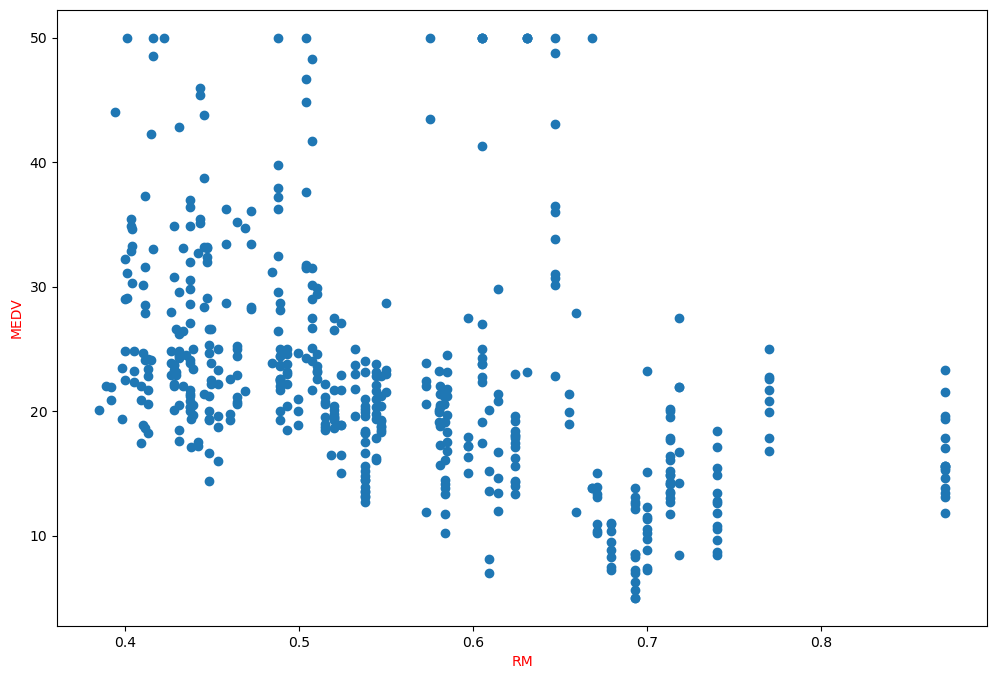

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(boston['NOX'], boston['MEDV'] )
plt.xlabel('RM', color = 'red')
plt.ylabel('MEDV', color = 'red')
plt.show()

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
for_study = ['CRIM', 'ZN', 'MEDV', 'LSTAT']

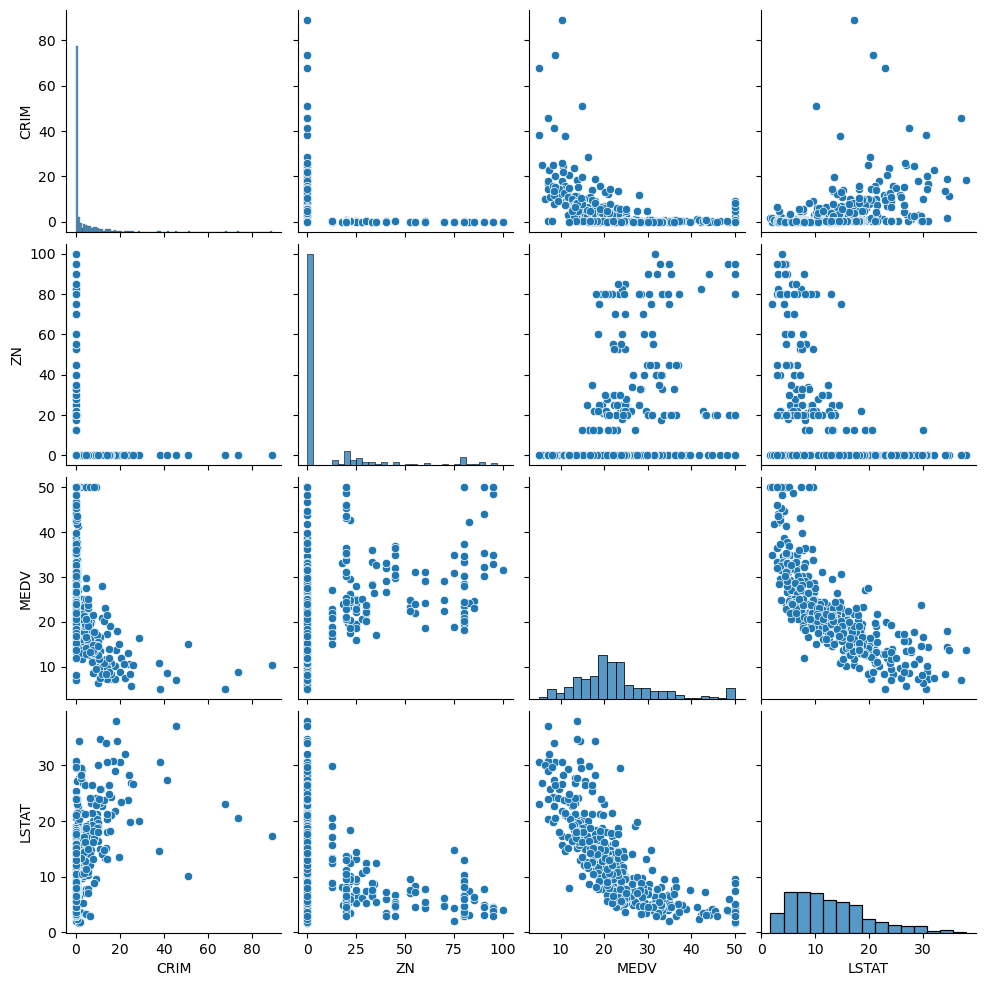

In [ ]:
sns.pairplot(boston[for_study], height = 2.5)
plt.show()

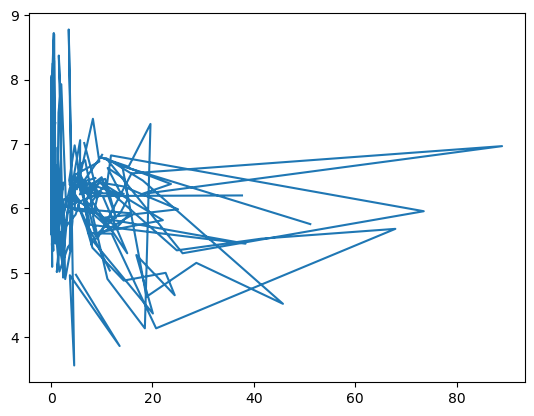

In [ ]:
plt.plot( boston['CRIM'], boston['RM'])

In [ ]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


<Axes: >

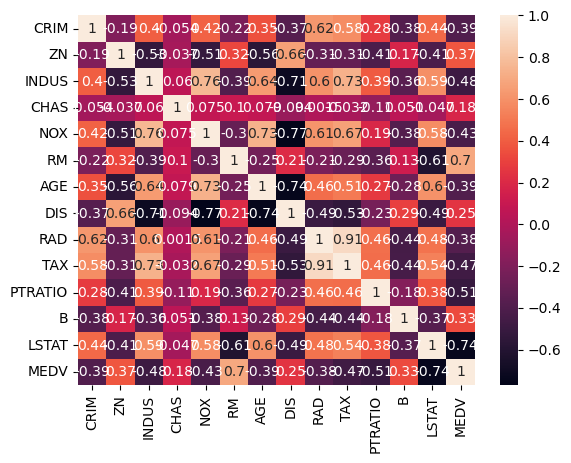

In [ ]:
sns.heatmap(boston.corr(), annot =True, cbar = bool)

In [ ]:
X = boston['RM'].values.reshape(-1,1)

In [ ]:
y = boston['MEDV']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
type(LinearRegression)

abc.ABCMeta

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.coef_

array([9.10210898])

In [ ]:
model.intercept_

np.float64(-34.67062077643857)

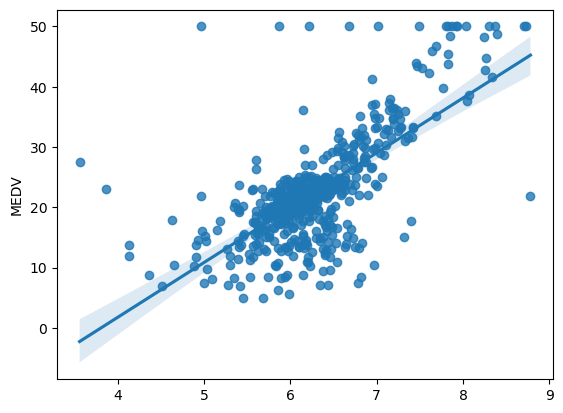

In [ ]:
sns.regplot(x = X,y = y) ;
plt.show()

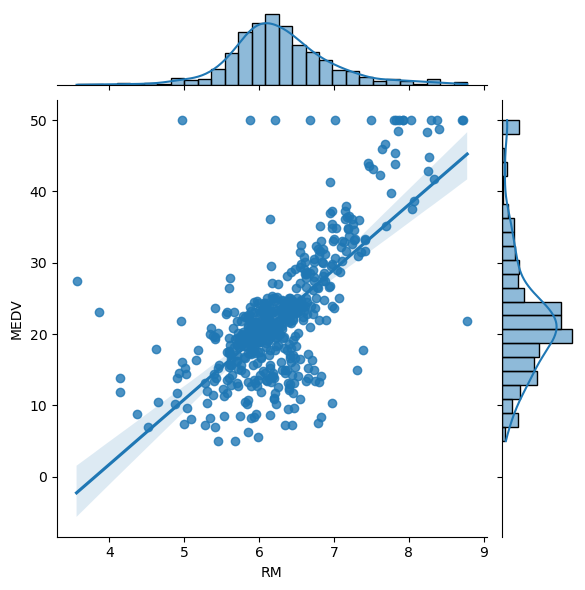

In [ ]:
sns.jointplot( x =boston['RM'], y= y, kind = 'reg')

In [ ]:
model.predict([ [9] ])

array([47.24836005])

In [ ]:
X = boston[['RM']].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
ransac = RANSACRegressor()
ransac.fit( X, y)

RANSACRegressor()

In [ ]:
inlier_mask = ransac.inlier_mask_

In [ ]:
outlier_mask = np.logical_not(inlier_mask)

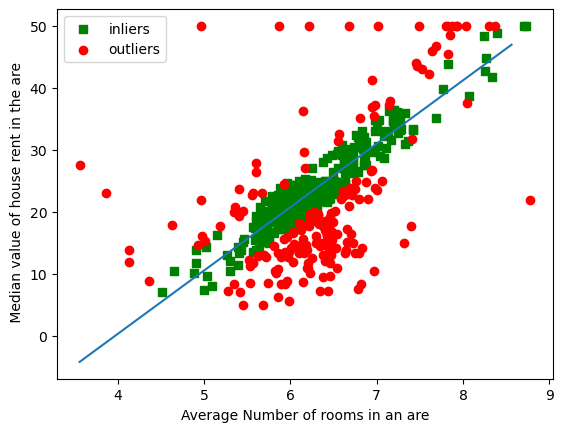

In [ ]:
x_axis = np.arange( X.min(), X.max(), 1).reshape(-1,1)
pred_y = ransac.predict( x_axis)
plt.plot( x_axis, pred_y)
plt.scatter( X[inlier_mask], y[inlier_mask],  color = 'green', marker ='s', label = 'inliers')
plt.scatter( X[outlier_mask], y[outlier_mask],  color ='red', marker = 'o', label = 'outliers')
plt.xlabel('Average Number of rooms in an are')
plt.ylabel(' Median value of house rent in the are')
plt.legend()
plt.show()

In [ ]:
X = boston['LSTAT'].values

mask = np.isnan(X)

X = np.delete(X, mask)
y = np.delete( y, mask)
X= X.reshape(-1,1)



In [ ]:
ransac2 = RANSACRegressor()

In [ ]:
ransac2.fit(X,y)

RANSACRegressor()

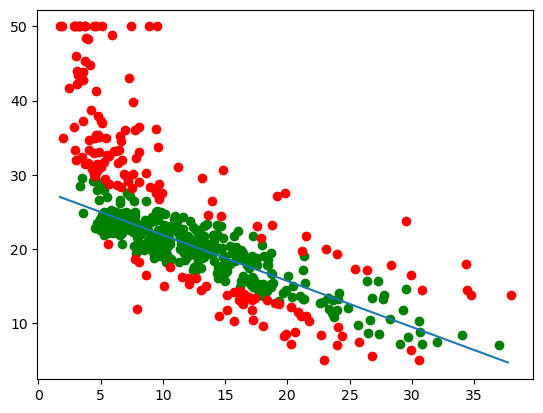

In [ ]:
x_value = np.arange(X.min(), X.max()).reshape(-1,1);
y_predict = ransac2.predict( x_value);
plt.plot( x_value, y_predict);
inlier = ransac2.inlier_mask_
outlier = np.logical_not(inlier)

plt.scatter( X[inlier], y[inlier], label = 'inlier', c = 'green')
plt.scatter( X[outlier], y[outlier], label = 'outlier', c = 'red')


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston['RM'], boston['MEDV'])

In [ ]:
X_train = X_train.values.reshape(-1, 1)
ransac.fit(X_train , y_train)

RANSACRegressor()

In [ ]:
y_train.max()

50.0

In [ ]:
Y_predict_train = ransac.predict(X_train)
Y_predict_train.max()

np.float64(46.320553196185145)

In [ ]:
Y_predict_test = ransac.predict(X_test.values.reshape(-1, 1))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score?

Signature:
r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    force_finite=True,
)
Docstring:
:math:`R^2` (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). In the general case when the true y is
non-constant, a constant model that always predicts the average y
disregarding the input features would get a :math:`R^2` score of 0.0.

In the particular case when ``y_true`` is constant, the :math:`R^2` score
is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
(imperfect predictions). To prevent such non-finite numbers to pollute
higher-level experiments such as a grid search cross-validation, by default
these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
predictions) respectively. You can set ``force_finite`` to ``False`` to
prevent this fix from happening.

Note: when the prediction residuals hav

In [ ]:
r2_score( y_train, Y_predict_train)
mean_squared_error( y_train, Y_predict_train)

45.89901492974167

In [ ]:
r2_score( y_test, Y_predict_test)
mean_squared_error( y_test, Y_predict_test)

39.31954275263158

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(boston['RM'])

In [ ]:
X

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [ ]:
y = boston['MEDV']
ols = sm.OLS(y, X)

In [ ]:
result = ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           2.49e-74
Time:                        20:20:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
del boston['MEDV']

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:

X = sm.add_constant(boston)


In [ ]:
print(X.isnull().sum())

const       0
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64
